In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
# ev_df.head()
census_path = 'Resources/2022_census'
cen_df = pd.read_csv(census_path)

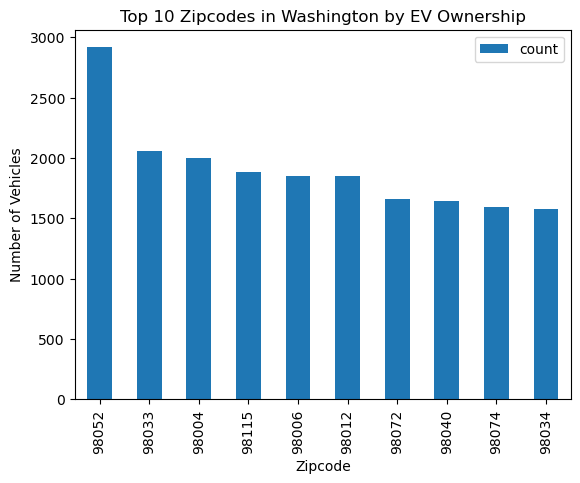

In [38]:
#Ownership by zipcode
zip_count = ev_df['Postal Code'].value_counts()
zip_count_df = pd.DataFrame(zip_count)

#Narrowing DataFrame to only top 10 zipcodes with most EV ownership
zip_df = zip_count_df.nlargest(10,columns=['count'])
zip_df

zip_df.plot(kind='bar',title='Top 10 Zipcodes in Washington by EV Ownership',xlabel='Zipcode',ylabel='Number of Vehicles')

plt.show()

In [67]:
# get population and zipcode separated from df
pop_df = cen_df[['WA Zipcode', 'Population']]
sorted_pop = pop_df.sort_values(by='Population', ascending=False)
top_pop_df = sorted_pop.head(10)
# get income and zipcode separated from df
income_df = cen_df[['WA Zipcode', 'Median Household Income']]
sorted_income = income_df.sort_values(by='Median Household Income', ascending=False)
top_income_df = sorted_income.head(10)
#get per capita and zipcode separted from df
pc_df = cen_df[['WA Zipcode','Income Per Capita']]

<BarContainer object of 10 artists>

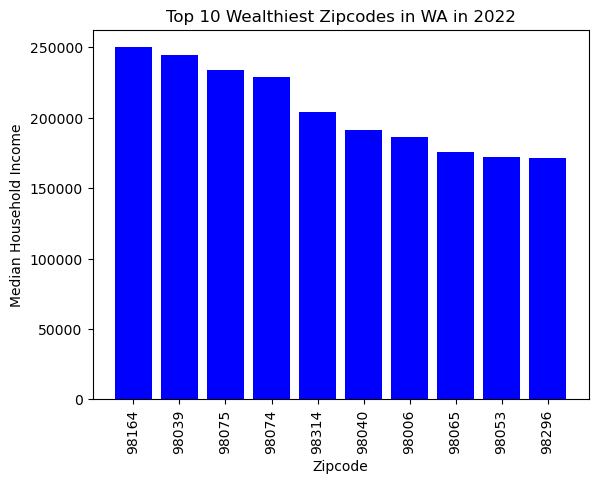

In [68]:
# plot income vs zipcode to find similarities
x_axis = np.arange(len(top_income_df['WA Zipcode']))
income_axis = top_income_df['Median Household Income']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_income_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Wealthiest Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Median Household Income")
plt.bar(x_axis, income_axis, color='b')
# plt.show()

**only 98074 are in the top 10 wealthiest and top 10 EV ownership dataframes**

<BarContainer object of 10 artists>

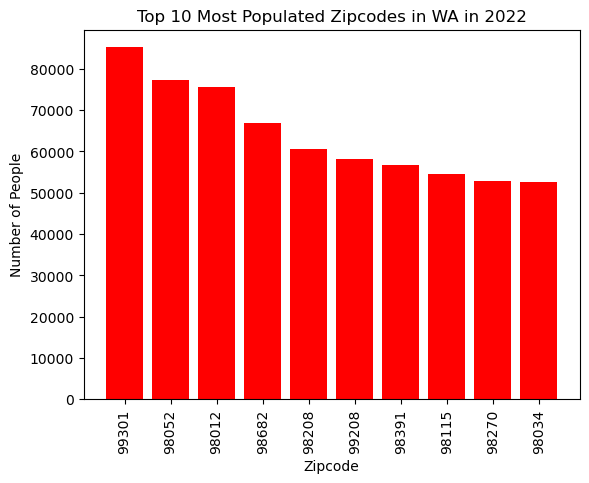

In [69]:
zip_axis = np.arange(len(top_pop_df['WA Zipcode']))
pop_axis = top_pop_df['Population']
tick_locations = [value for value in zip_axis]
plt.xticks(tick_locations, top_pop_df['WA Zipcode'],rotation='vertical')
plt.title("Top 10 Most Populated Zipcodes in WA in 2022")
plt.xlabel("Zipcode")
plt.ylabel("Number of People")
plt.bar(zip_axis, pop_axis, color='r')
# plt.show()

**the zipcodes 98052 and 98115 show up both in the top 10 population and top 10 EV ownership graphs**

In [217]:
# run some linear regression to show if population affects EV ownership
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,Make,Model,Electric Vehicle Type
0,2022,98901,33106,55536,25237.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
1,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
2,2022,98901,33106,55536,25237.0,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV)
3,2022,98901,33106,55536,25237.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)
4,2022,98901,33106,55536,25237.0,MERCEDES-BENZ,B-CLASS,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...
112241,2022,99131,122,34081,31798.0,NISSAN,LEAF,Battery Electric Vehicle (BEV)
112242,2022,99348,1590,74211,32056.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV)
112243,2022,98336,594,76250,30549.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV)
112244,2022,98935,4378,60085,18814.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV)


In [226]:
ev_count = clean_merged_df.groupby('Postal Code').count()
type_count = ev_count[['Electric Vehicle Type']]
type_count = type_count.reset_index()

In [221]:
# population = clean_merged_df['Population'].unique()
# for each pop in population:

df = clean_merged_df[['Postal Code','Population']]
df_per_cap = df.drop_duplicates()




,Postal Code,Population
0,98901,33106
69,98237,4979
90,98201,30587
340,98021,34993
1496,98203,36448
...,...,...
112241,99131,122
112242,99348,1590
112243,98336,594
112244,98935,4378


In [260]:
merged_percapita = pd.merge(df_per_cap, type_count, on='Postal Code', how='outer')
merged_percapita

,Postal Code,Population,Electric Vehicle Type
0,98901,33106,69
1,98237,4979,21
2,98201,30587,250
3,98021,34993,1156
4,98203,36448,344
...,...,...,...
491,99131,122,1
492,99348,1590,1
493,98336,594,1
494,98935,4378,1


In [261]:
merged_percapita['EV Population Percent'] = (merged_percapita['Electric Vehicle Type']/merged_percapita['Population'])*100
merged_percapita = merged_percapita.rename(columns = {'Electric Vehicle Type':'Electric Vehicle Count'})

In [263]:
merged_percapita.sort_values(by='EV Population Percent', ascending=False)

,Postal Code,Population,Electric Vehicle Count,EV Population Percent
344,98134,852,158,18.544601
451,98833,153,14,9.150327
153,98039,2923,242,8.279165
441,98286,158,11,6.962025
124,98072,25034,1661,6.634976
...,...,...,...,...
492,99348,1590,1,0.062893
437,98952,1724,1,0.058005
411,98857,3545,2,0.056417
403,98951,13145,5,0.038037


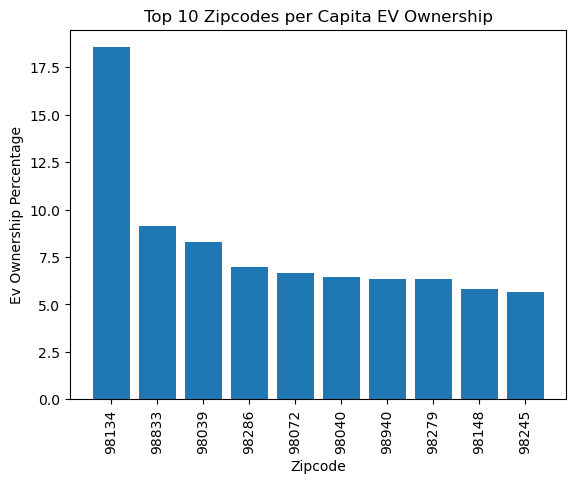

In [243]:
merged_percapita_top10 = merged_percapita.nlargest(10,columns='Population Percent')

x_axis_list = np.arange(len(merged_percapita_top10['Postal Code']))
x_ticks = [value for value in x_axis_list]
y_axis = merged_percapita_top10['Population Percent']
plt.title('Top 10 Zipcodes per Capita EV Ownership')
plt.xlabel('Zipcode')
plt.ylabel('Ev Ownership Percentage')
plt.xticks(x_ticks, merged_percapita_top10['Postal Code'], rotation='vertical')
plt.bar(x_axis, y_axis)
plt.show()

In [268]:
clean_ev_cen = ev_cen.groupby('Make').agg({'Median Household Income':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>50]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
clean_ev_cen_filtered.sort_values('Median Household Income_median')

(34, 4)
(26, 4)


,Make_,Median Household Income_median,Median Household Income_mean,Postal Code_<lambda>
22,MITSUBISHI,92005.0,96464.738014,192
5,CHEVROLET,96627.0,104296.235445,420
9,FORD,97953.0,104074.767047,392
31,TOYOTA,98057.0,105983.395700,368
4,CADILLAC,98168.0,102987.777778,85
6,CHRYSLER,98912.0,107885.954418,272
27,SMART,98912.0,106836.446886,140
15,KIA,102050.0,109234.568492,347
14,JEEP,102933.0,110194.394760,272
26,RIVIAN,103222.0,111950.947964,211


In [282]:
ev_sum = clean_ev_cen_filtered['Postal Code_<lambda>'].sum()
clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100
clean_ev_cen_filtered = clean_ev_cen_filtered.sort_values(by='Median Household Income_median')
clean_ev_cen_filtered

/var/folders/q0/1ctrg7ln7537xxm0j8j094dm0000gn/T/ipykernel_7117/416942508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ev_cen_filtered['Make Percent'] = (clean_ev_cen_filtered['Postal Code_<lambda>']/ev_sum)*100


,Make_,Electric Vehicle Type_,Median Household Income_median,Median Household Income_mean,Postal Code_<lambda>,Make Percent
31,MITSUBISHI,Plug-in Hybrid Electric Vehicle (PHEV),92005.0,95694.215385,180,2.188716
13,FORD,Plug-in Hybrid Electric Vehicle (PHEV),95595.0,100865.511621,362,4.401751
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),96615.0,102946.278974,383,4.657101
7,CHEVROLET,Battery Electric Vehicle (BEV),97344.0,105543.589083,373,4.535506
43,TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),98057.0,105847.194251,366,4.450389
6,CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),98168.0,102987.777778,85,1.033560
21,KIA,Plug-in Hybrid Electric Vehicle (PHEV),98805.0,106584.004898,259,3.149319
37,SMART,Battery Electric Vehicle (BEV),98912.0,106836.446886,140,1.702335
9,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),98912.0,107885.954418,272,3.307393
30,MITSUBISHI,Battery Electric Vehicle (BEV),100426.5,102725.234375,52,0.632296


<BarContainer object of 38 artists>

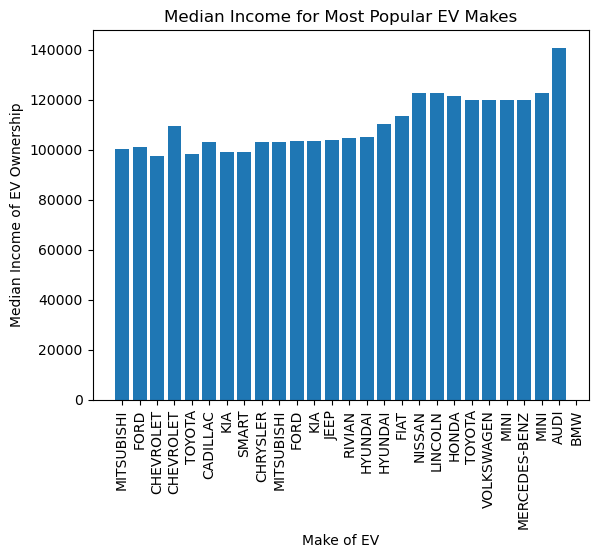

In [283]:
x_axis_list = np.arange(len(clean_ev_cen_filtered['Make_']))
x_ticks = [value for value in x_axis_list]
plt.title('Median Income for Most Popular EV Makes')
plt.xlabel('Make of EV')
plt.ylabel('Median Income of EV Ownership')
plt.xticks(x_ticks, clean_ev_cen_filtered['Make_'], rotation='vertical')
plt.bar(clean_ev_cen_filtered['Make_'], clean_ev_cen_filtered['Median Household Income_median'])


In [284]:
# x_axis_list = np.arange(len(clean_ev_cen_filtered['Make_']))
# x_ticks = [value for value in x_axis_list]
# plt.xticks(x_ticks, clean_ev_cen_filtered['Make_'], rotation='vertical')
# plt.bar(clean_ev_cen_filtered['Make_'], clean_ev_cen_filtered['Postal Code_<lambda>'])

In [302]:
clean_ev_cen = ev_cen.groupby(['Make','Electric Vehicle Type']).agg({'Median Household Income':['median','mean'],
                           'Postal Code':lambda x: x.nunique()}).reset_index()
clean_ev_cen.columns = clean_ev_cen.columns.map('_'.join)
print(clean_ev_cen.shape)
clean_ev_cen_filtered = clean_ev_cen[clean_ev_cen['Postal Code_<lambda>']>50]
#                                      np.nanquantile(clean_ev_cen['Postal Code_<lambda>'],0.025)]
print(clean_ev_cen_filtered.shape)
clean_ev_cen_filtered


(47, 5)
(38, 5)


,Make_,Electric Vehicle Type_,Median Household Income_median,Median Household Income_mean,Postal Code_<lambda>
0,AUDI,Battery Electric Vehicle (BEV),122656.0,126280.419412,224
1,AUDI,Plug-in Hybrid Electric Vehicle (PHEV),114026.0,120485.026578,233
4,BMW,Battery Electric Vehicle (BEV),121338.0,126089.903548,182
5,BMW,Plug-in Hybrid Electric Vehicle (PHEV),118634.0,122222.444031,314
6,CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),98168.0,102987.777778,85
7,CHEVROLET,Battery Electric Vehicle (BEV),97344.0,105543.589083,373
8,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),96615.0,102946.278974,383
9,CHRYSLER,Plug-in Hybrid Electric Vehicle (PHEV),98912.0,107885.954418,272
10,FIAT,Battery Electric Vehicle (BEV),103338.0,111048.182704,219
12,FORD,Battery Electric Vehicle (BEV),101174.0,109434.401571,315


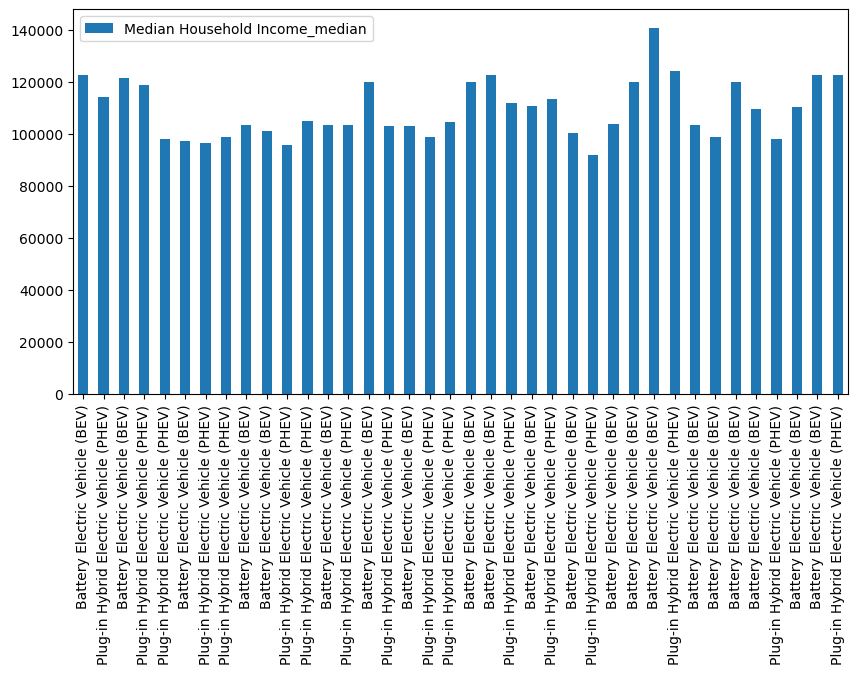

In [297]:
make_type_df = clean_ev_cen_filtered[['Make_','Electric Vehicle Type_','Median Household Income_median']]
# make_type_df = make_type_df.set_index('Make_')
make_type_plot = make_type_df.plot(kind='bar', figsize=(10,5))
make_type_plot.set_xticklabels(make_type_df['Electric Vehicle Type_'])
plt.show()

In [166]:
# income_list = []
# pc_list = []


In [167]:
#make vs income 
# make_df = clean_merged_df.groupby('Make').value_counts()
# make_df = make_df.reset_index()
# all_makes = make_df['Make'].unique()
# all_makes = list(all_makes)
# for make in all_makes:
#     make_value = make_df.loc[make_df['Make']==make, :]
#     income_list.append(make_value['Median Household Income'].mean())
#     pc_list.append(make_value['Income Per Capita'].mean())
# make_df

,Make,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,County,Model,Electric Vehicle Type,count
0,AUDI,2022,98004,39161,157784,117764.0,King,E-TRON,Battery Electric Vehicle (BEV),26
1,AUDI,2022,98040,25464,190985,113575.0,King,E-TRON,Battery Electric Vehicle (BEV),26
2,AUDI,2022,98072,25034,157963,79154.0,King,E-TRON,Battery Electric Vehicle (BEV),24
3,AUDI,2022,98112,23456,153204,118391.0,King,E-TRON,Battery Electric Vehicle (BEV),24
4,AUDI,2022,98103,51878,122656,84147.0,King,A3,Plug-in Hybrid Electric Vehicle (PHEV),22
...,...,...,...,...,...,...,...,...,...,...
14150,VOLVO,2022,98351,1119,130000,71091.0,Pierce,XC40,Battery Electric Vehicle (BEV),1
14151,VOLVO,2022,98338,32522,106587,41879.0,Pierce,XC90,Plug-in Hybrid Electric Vehicle (PHEV),1
14152,VOLVO,2022,98335,28002,119986,63748.0,Pierce,S90,Plug-in Hybrid Electric Vehicle (PHEV),1
14153,VOLVO,2022,98335,28002,119986,63748.0,Pierce,S60,Plug-in Hybrid Electric Vehicle (PHEV),1


In [168]:
# income_type = []
# pc_type = []

In [169]:
# EV type vs income 
# type_df = clean_merged_df.groupby('Electric Vehicle Type').value_counts()
# type_df = type_df.reset_index()
# all_types = type_df['Electric Vehicle Type'].unique()

# for car in all_types:
#     type_value = type_df.loc[type_df['Electric Vehicle Type']==car, :]
#     income_type.append(type_value['Median Household Income'].mean())
#     pc_type.append(type_value['Income Per Capita'].mean())
# type_df

,Electric Vehicle Type,Census Year,Postal Code,Population,Median Household Income,Income Per Capita,County,Make,Model,count
0,Battery Electric Vehicle (BEV),2022,98052,77324,158457,82929.0,King,TESLA,MODEL 3,820
1,Battery Electric Vehicle (BEV),2022,98052,77324,158457,82929.0,King,TESLA,MODEL Y,643
2,Battery Electric Vehicle (BEV),2022,98004,39161,157784,117764.0,King,TESLA,MODEL 3,534
3,Battery Electric Vehicle (BEV),2022,98033,40425,163786,102001.0,King,TESLA,MODEL 3,500
4,Battery Electric Vehicle (BEV),2022,98012,75555,139474,58143.0,Snohomish,TESLA,MODEL Y,473
...,...,...,...,...,...,...,...,...,...,...
14150,Plug-in Hybrid Electric Vehicle (PHEV),2022,98146,28088,101051,47291.0,King,LINCOLN,AVIATOR,1
14151,Plug-in Hybrid Electric Vehicle (PHEV),2022,98146,28088,101051,47291.0,King,KIA,SORENTO,1
14152,Plug-in Hybrid Electric Vehicle (PHEV),2022,98146,28088,101051,47291.0,King,HYUNDAI,IONIQ,1
14153,Plug-in Hybrid Electric Vehicle (PHEV),2022,98146,28088,101051,47291.0,King,FORD,ESCAPE,1


In [170]:
# summary tables
# income_avg_make = pd.DataFrame({'Make of EV': all_makes,
# #                                'Average Median Income': income_list,
# #                                'Average Per Capita Income': pc_list})
# # make_summary = income_avg_make.round(decimals=2)
# # make_summary = make_summary.sort_values(by='Average Median Income')
# # income_avg_type = pd.DataFrame({'Electric Vehicle Type': all_types,
# #                               'Average Median Income': income_type,
# #                                'Average Per Capita Income': pc_type})
# # type_summary = income_avg_type.round(decimals=2)
# # type_summary = type_summary.sort_values(by='Average Median Income')

In [171]:
# make_summary

,Make of EV,Average Median Income,Average Per Capita Income
2,BENTLEY,89286.00,43875.50
23,NISSAN,90435.44,46705.66
29,TESLA,92065.26,47933.66
5,CHEVROLET,92658.81,47885.97
9,FORD,95852.70,49249.71
6,CHRYSLER,95926.34,49498.09
31,TOYOTA,96423.37,50382.95
14,JEEP,97332.32,50228.01
7,FIAT,98095.67,50912.08
32,VOLKSWAGEN,98968.19,51867.26


In [172]:
# type_summary

,Electric Vehicle Type,Average Median Income,Average Per Capita Income
0,Battery Electric Vehicle (BEV),100357.68,52707.26
1,Plug-in Hybrid Electric Vehicle (PHEV),101187.81,52953.88


<BarContainer object of 34 artists>

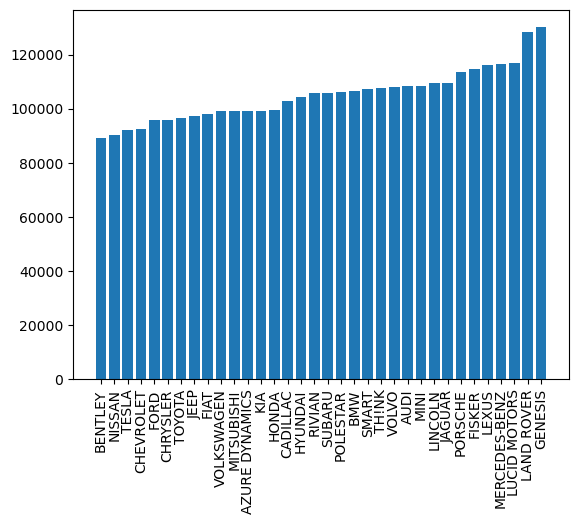

In [179]:
# make_list = np.arange(len(make_summary['Make of EV']))
# make_ticks = [value for value in make_list]
# plt.xticks(make_ticks, make_summary['Make of EV'], rotation='vertical')
# plt.bar(make_list, make_summary['Average Median Income'])